# **Carregando dados do Github e as classes do arcabouço Engajamais**

In [ ]:
!git clone https://github.com/herbert1703/Engajamais

Cloning into 'Engajamais'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 59 (delta 24), reused 46 (delta 11), pack-reused 0
Unpacking objects: 100% (59/59), 9.86 MiB | 4.51 MiB/s, done.


In [ ]:
import sys
sys.path.insert(0,'Engajamais')

In [ ]:
import engajamaisclasses as engj

Instalando Pacote Shap...
Instalando Pacote catboost...
Instalando Pacote BorutaShap...
Instalando Pacote Pyod para detecção de outlier...


# **Exemplo de uso do arcabouço com dados da UPE**

In [ ]:
arcabouco_xai = engj.Engaja_mais()

**Carregamento do arquivo, análise exploratória, validação cruzada e análise explicabilidade global**

In [ ]:
#### Definição das variávies ########
engj.config_experimento.featuresselecionadas=["var01","var02","var03",
                        "var10","var12","var13","var16",
                        "var17","var20","var21","var26","var27","var29"]
engj.config_experimento.var_y = 'EVASAO' 
engj.config_experimento.otimizahiperparametros=True

In [ ]:
##### Carregamento do arquivo csv ############
arcabouco_xai.carrega_arq_treino('Engajamais/evasao_UPE.csv')

,Curso,Semestre,Periodo,Disciplina,ID da Disciplina,Data de Início,Data de Final,Aluno,ID do Aluno,var01,var02,var03,var10,var11,var12,var13,var16,var17,var18,var19,var20,var21,var26,var27,var29,EVASAO,PROBABILIDADE
0,Pedagogia,2010.2,1,Antropologia,15,1277942400,1293839999,ADRIANA SUZI BRASIL VASCO,142,"5,15",33,43,"9,29","1,27",60,5,33,75,0,69,1,0,25,11,4,0,"0,008802777"
1,Pedagogia,2010.2,1,Antropologia,15,1277942400,1293839999,AMÉLIA GOMES CALAÇA,196,"1,54",12,8,"2,43","0,04",11,1,1,39,0,36,0,0,25,11,4,0,"0,826449615"
2,Pedagogia,2010.2,1,Antropologia,15,1277942400,1293839999,ANA CRISTINA DE ASEVEDO LIMA PIRES,143,"0,31",5,0,1,"0,04",1,0,1,4,1,4,0,1,25,11,4,1,"0,982971211"
3,Pedagogia,2010.2,1,Antropologia,15,1277942400,1293839999,ANA MARIA DE BRITO BARRO,144,"2,65",26,21,"4,78","0,38",29,4,10,56,0,50,0,0,25,11,4,0,"0,210792134"
4,Pedagogia,2010.2,1,Antropologia,15,1277942400,1293839999,ANA SELMA CAVALCANTE MOURA,44,"2,12",16,20,"4,63","0,15",26,4,4,48,0,41,0,0,25,11,4,0,"0,112907865"


Index(['var01', 'var02', 'var03', 'var10', 'var12', 'var13', 'var16', 'var17',
       'var20', 'var21', 'var26', 'var27', 'var29'],
      dtype='object')


In [ ]:
############### Atlerações em algumas variáveis da base da UPE ############
arcabouco_xai.df_['var01'] = arcabouco_xai.df_['var01'].str.replace(',','.')
arcabouco_xai.df_['var10'] = arcabouco_xai.df_['var10'].str.replace(',','.')
arcabouco_xai.df_['var11'] = arcabouco_xai.df_['var11'].str.replace(',','.')
arcabouco_xai.df_['var01'] = arcabouco_xai.df_['var01'].astype(float)
arcabouco_xai.df_['var10'] = arcabouco_xai.df_['var10'].astype(float)
arcabouco_xai.df_['var11'] = arcabouco_xai.df_['var11'].astype(float)

In [ ]:
############## Definindo nomes dos campos para análise exploratória ######
arcabouco_xai.analise_expl_dados.nomevarevasao = engj.config_experimento.var_y
arcabouco_xai.analise_expl_dados.nomevarcurso = 'Curso'
arcabouco_xai.analise_expl_dados.nomevaraluno = 'Aluno'

<Figure size 3600x432 with 0 Axes>

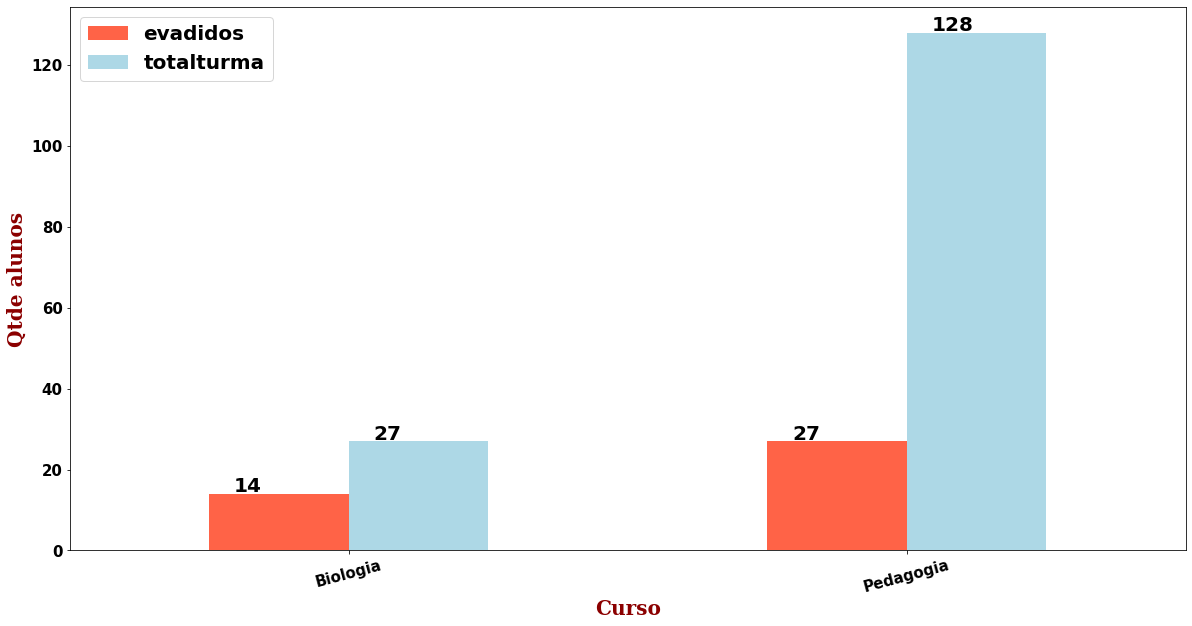

,Curso,totalturma,evadidos,perc_evadidos
0,Biologia,27,14,51.85
1,Pedagogia,128,27,21.09


In [ ]:
arcabouco_xai.analise_expl_dados.plota_situacao_evasao(arcabouco_xai.df_)

,var01,var02,var03,var10,var12,var13,var16,var17,var20,var21,var26,var27,var29
count,6654.00000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000,6654.000000
mean,3.11014,20.729336,29.945146,4.521913,20.402765,2.975503,7.653892,28.161407,4.289450,2.126991,3.461226,10.495191,3.468440
std,3.00232,24.244947,32.776385,3.985320,24.096132,2.117438,17.202842,27.074838,11.375414,7.057894,4.865970,2.162751,0.998185
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,1.12000,6.000000,7.000000,2.500000,6.000000,2.000000,0.000000,8.000000,0.000000,0.000000,0.000000,9.000000,3.000000
50%,2.62000,15.000000,22.000000,4.130000,15.000000,3.000000,1.000000,23.000000,0.000000,0.000000,2.000000,11.000000,4.000000
75%,4.31000,27.000000,42.000000,6.000000,27.000000,4.000000,9.000000,43.000000,2.000000,1.000000,6.000000,11.000000,4.000000
max,23.85000,296.000000,273.000000,76.140000,526.000000,26.000000,297.000000,264.000000,102.000000,97.000000,25.000000,17.000000,4.000000


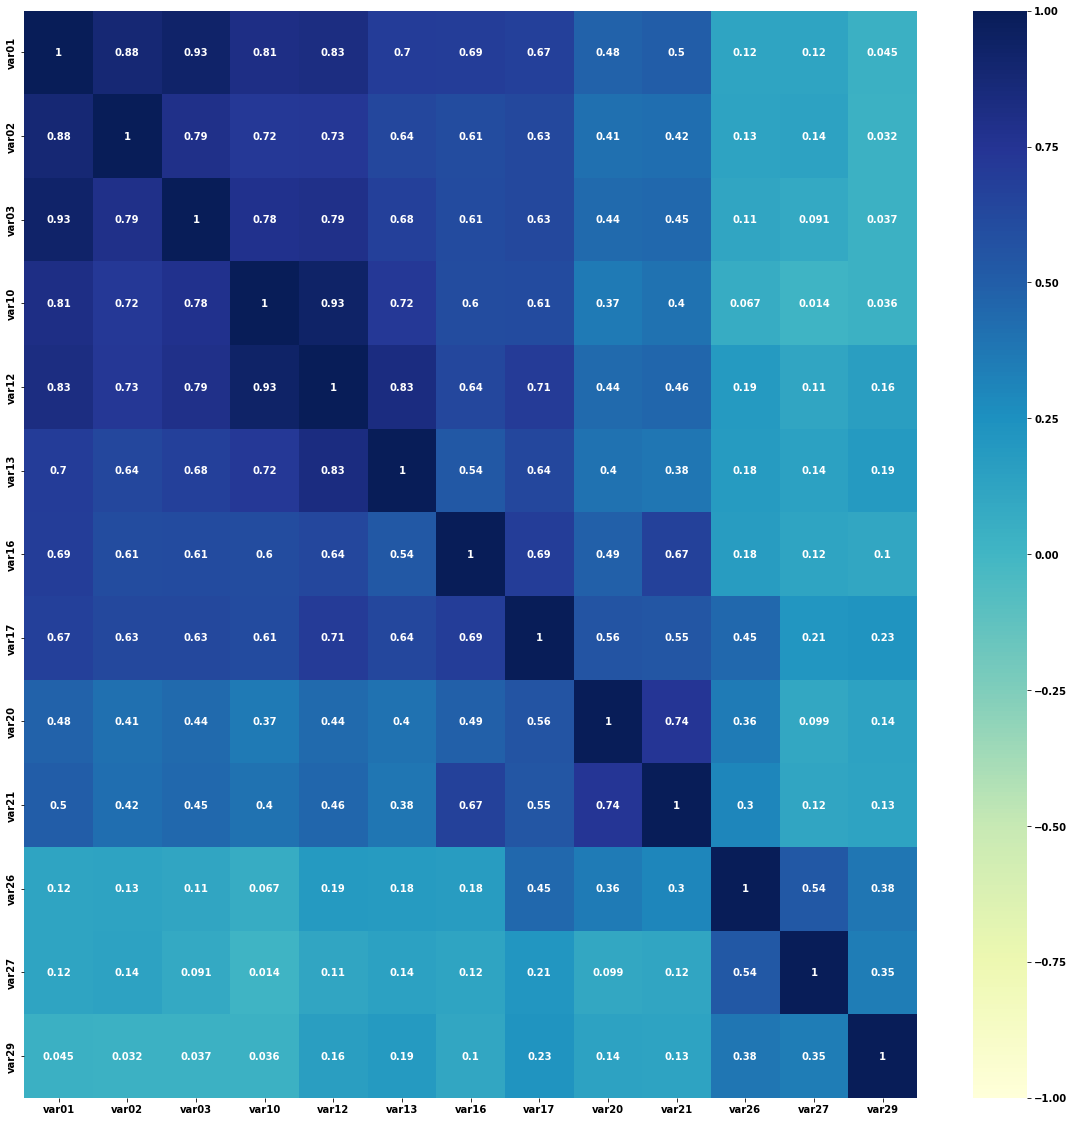

In [ ]:
############ Plotando estatística dos dados ######
arcabouco_xai.analise_expl_dados.plota_estat_dados(arcabouco_xai.df_)

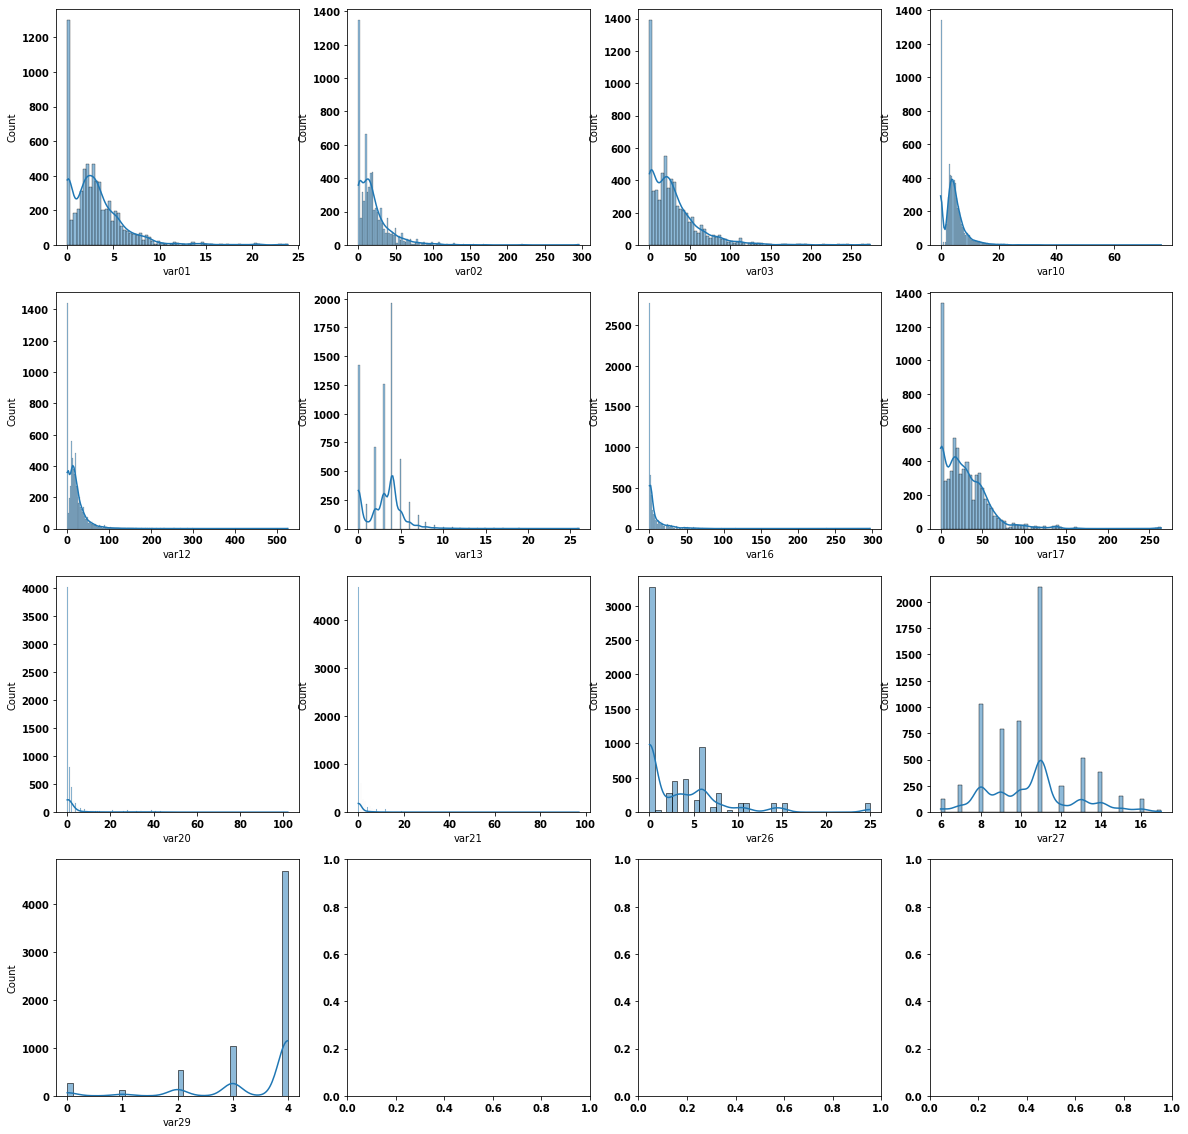

In [ ]:
arcabouco_xai.analise_expl_dados.plota_hist_dados(arcabouco_xai.df_)

In [ ]:
######### Apresenta as configurações definidas para o arcabouço #######
engj.config_experimento.info()

Features selecionadas: ['var01', 'var02', 'var03', 'var10', 'var12', 'var13', 'var16', 'var17', 'var20', 'var21', 'var26', 'var27', 'var29']
Métricas utilizadas..: ['accuracy', 'recall', 'f1', 'precision', 'roc_auc', 'recall_macro']
Variável Alvo........: EVASAO
Executa balanceamento: True
Normalização.........: False
Remove outliers......: True
Utiliza otimiz Parâm.: True
Tipo Split de dados .: 1
N_repeats Stratified.: 3
K_folds Stratified...: 5
Perc.Treinamento.....: 0.7
Perc.Teste...........: 0.3
Classificadores......:
{'nome_classificador': 'LR', 'classificador': LogisticRegression(), 'parametros': {'max_iter': [20, 50, 100, 200, 500, 1000, 2000, 5000], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'penalty': ['l2', 'none'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': ['balanced', 'none']}, 'normaliza': True, 'executa_validacao': True, 'detalhe_treino': True, 'params_shap': {'tipo_explainer': 'agnostico', 'param_proba': 'predict_proba', 'check_additivity': True, '

In [ ]:
############# Realiza alterações nas configurações dos classificadores ########
### Neste caso, define se será realizado o crossval para cada classificador ###
vstatmodcrossval = [{'nome_modelo':'LR','crossval':True},
                    {'nome_modelo':'KNN','crossval':True},
                    {'nome_modelo':'RF','crossval':True},
                    {'nome_modelo':'XGB','crossval':True},
                    {'nome_modelo':'CAT','crossval':False},
                    {'nome_modelo':'LGB','crossval':True}]

for vmodel in vstatmodcrossval:
 engj.config_experimento.defval_cfg_modelo(vmodel['nome_modelo'],
                                      'executa_validacao',vmodel['crossval'])

# engj.config_experimento.defval_cfg_modelo('RF','detalhe_treino',False)


-----Detecção e remoção de outliers-----
[0.45701067 0.13791159]
Dispersão da base original


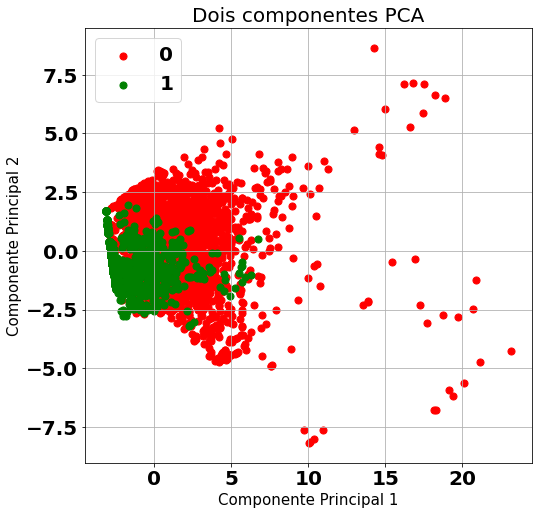

[0.4275162  0.14732145]
Dispersão depois de remoção de outliers


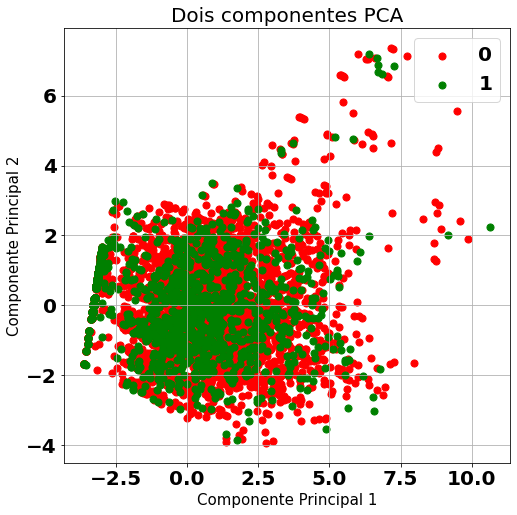

Concluído!
LR -Dados Normalizados:  True

-----Normalização dos dados para treinamento-----
Concluído!
Iteração: 1 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({1: 3010, 0: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.88941    Melhor Crossval f1-score......: 0.89643
Média teste f1-score...: 0.88539    Melhor predição teste f1-score: 0.88991
Iteração: 2 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.88828    Melhor Crossval f1-score......: 0.90432
Média teste f1-score...: 0.87434    Melhor predição teste f1-score: 0.87690
Iteração: 3 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1

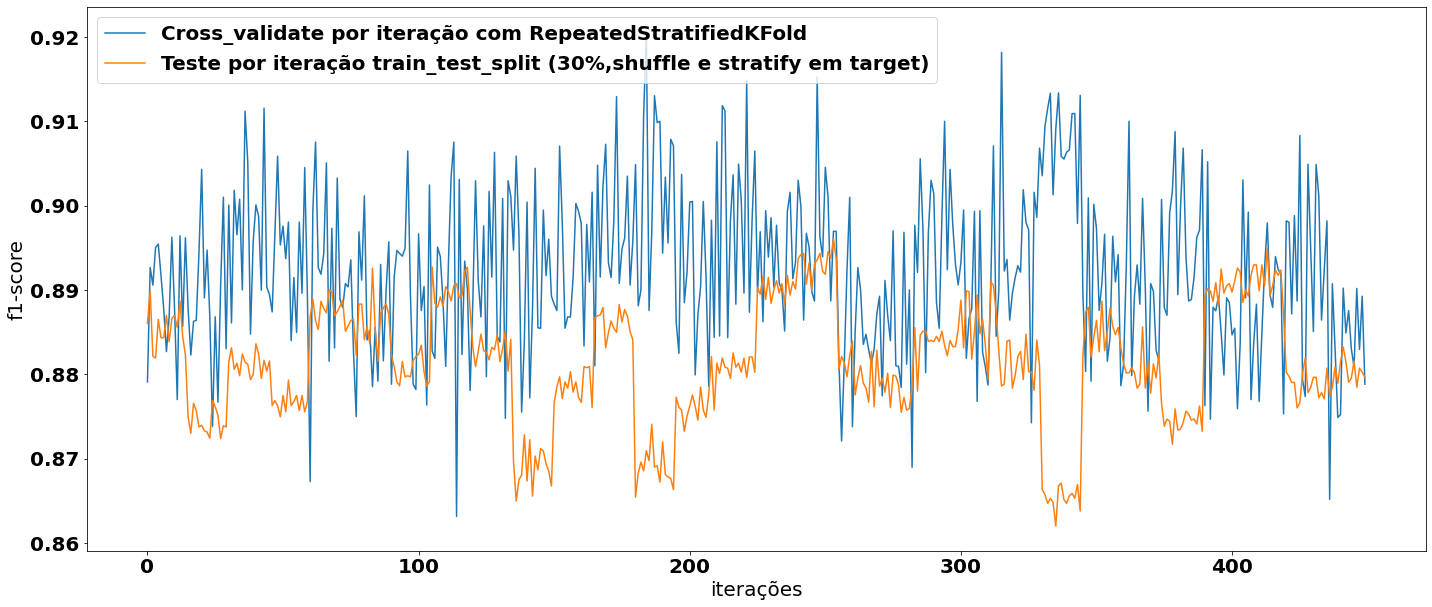

KNN -Dados Normalizados:  False

-----Sem normalização configurada para este classificador-----
Iteração: 1 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({1: 3010, 0: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.95810    Melhor Crossval f1-score......: 0.97406
Média teste f1-score...: 0.93711    Melhor predição teste f1-score: 0.94251
Iteração: 2 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.96047    Melhor Crossval f1-score......: 0.97347
Média teste f1-score...: 0.93534    Melhor predição teste f1-score: 0.94232
Iteração: 3 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score:

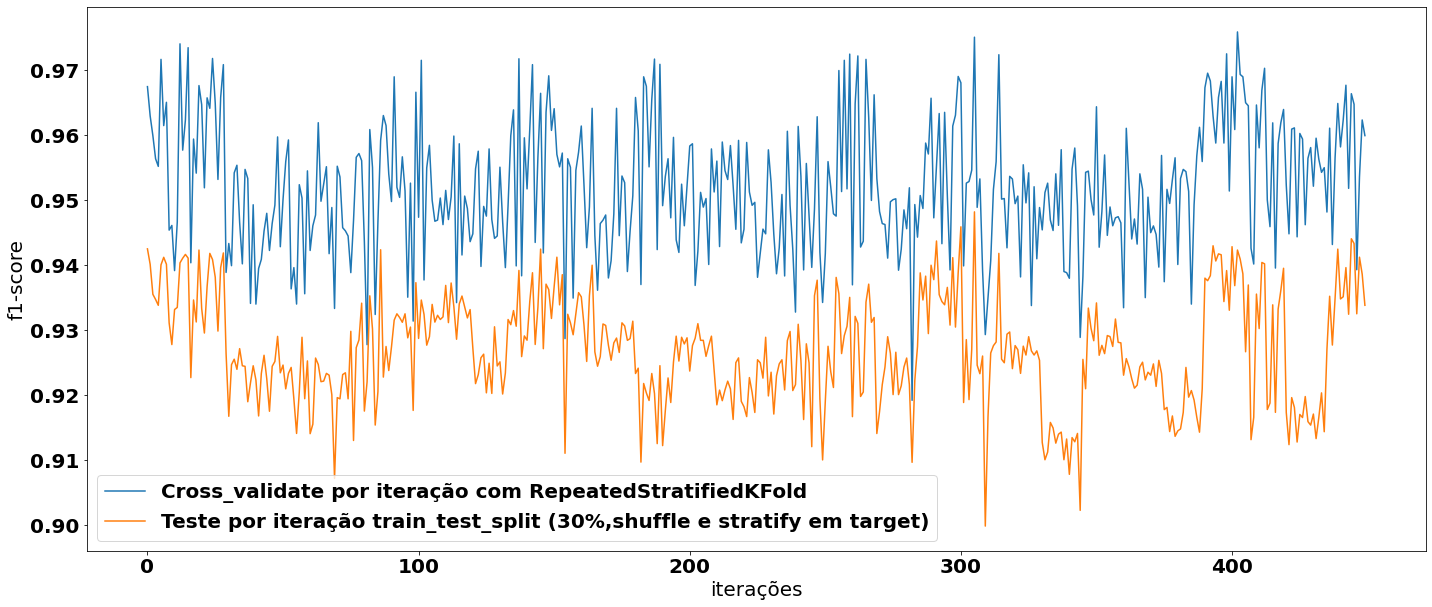

RF -Dados Normalizados:  False

-----Sem normalização configurada para este classificador-----
Iteração: 1 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({1: 3010, 0: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.98753    Melhor Crossval f1-score......: 0.99171
Média teste f1-score...: 0.97555    Melhor predição teste f1-score: 0.97951
Iteração: 2 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.98664    Melhor Crossval f1-score......: 0.99172
Média teste f1-score...: 0.97830    Melhor predição teste f1-score: 0.98214
Iteração: 3 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 

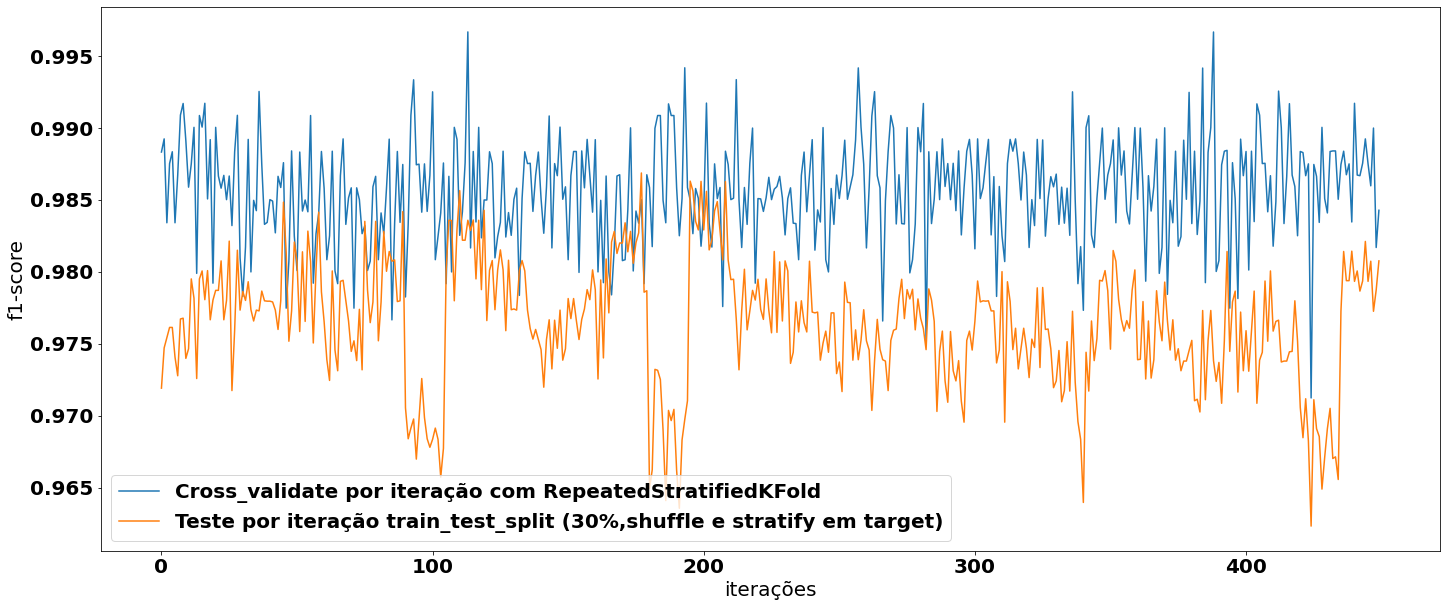

XGB -Dados Normalizados:  False

-----Sem normalização configurada para este classificador-----
Iteração: 1 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({1: 3010, 0: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.98927    Melhor Crossval f1-score......: 0.99338
Média teste f1-score...: 0.97950    Melhor predição teste f1-score: 0.98367
Iteração: 2 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.98661    Melhor Crossval f1-score......: 0.99338
Média teste f1-score...: 0.98431    Melhor predição teste f1-score: 0.98702
Iteração: 3 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score:

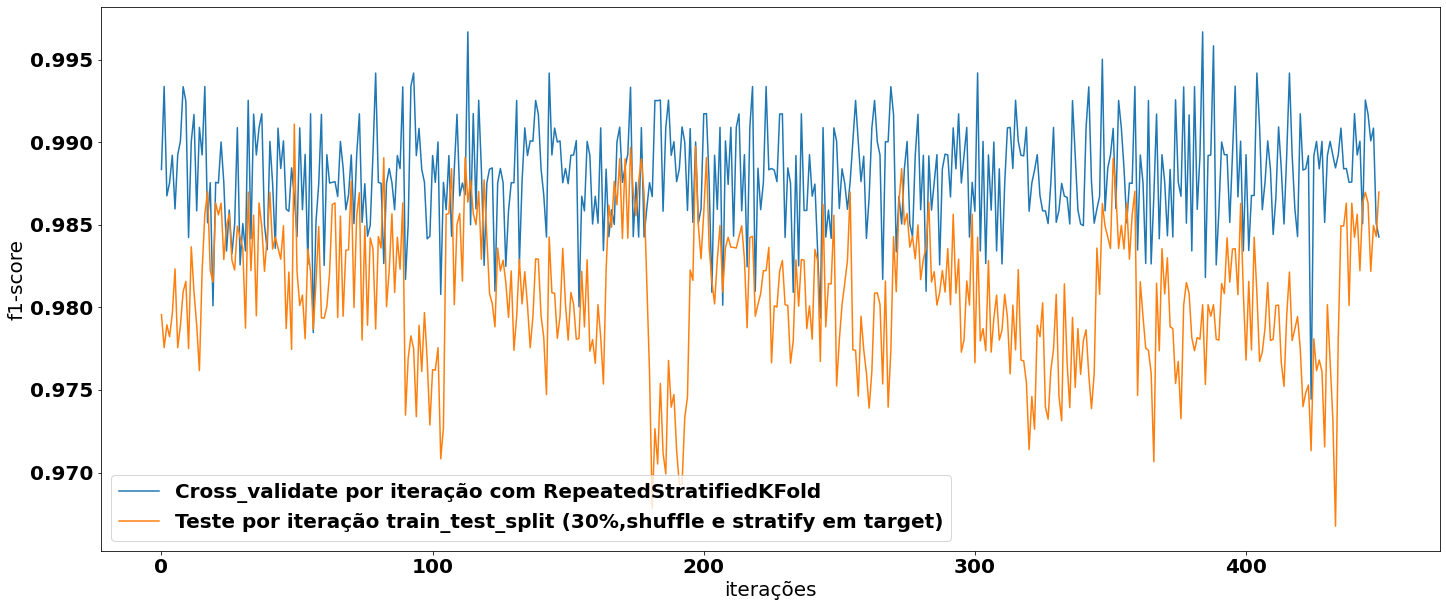

LGB -Dados Normalizados:  False

-----Sem normalização configurada para este classificador-----
Iteração: 1 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({1: 3010, 0: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.99121    Melhor Crossval f1-score......: 0.99669
Média teste f1-score...: 0.98546    Melhor predição teste f1-score: 0.98774
Iteração: 2 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.99032    Melhor Crossval f1-score......: 0.99586
Média teste f1-score...: 0.98673    Melhor predição teste f1-score: 0.98974
Iteração: 3 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score:

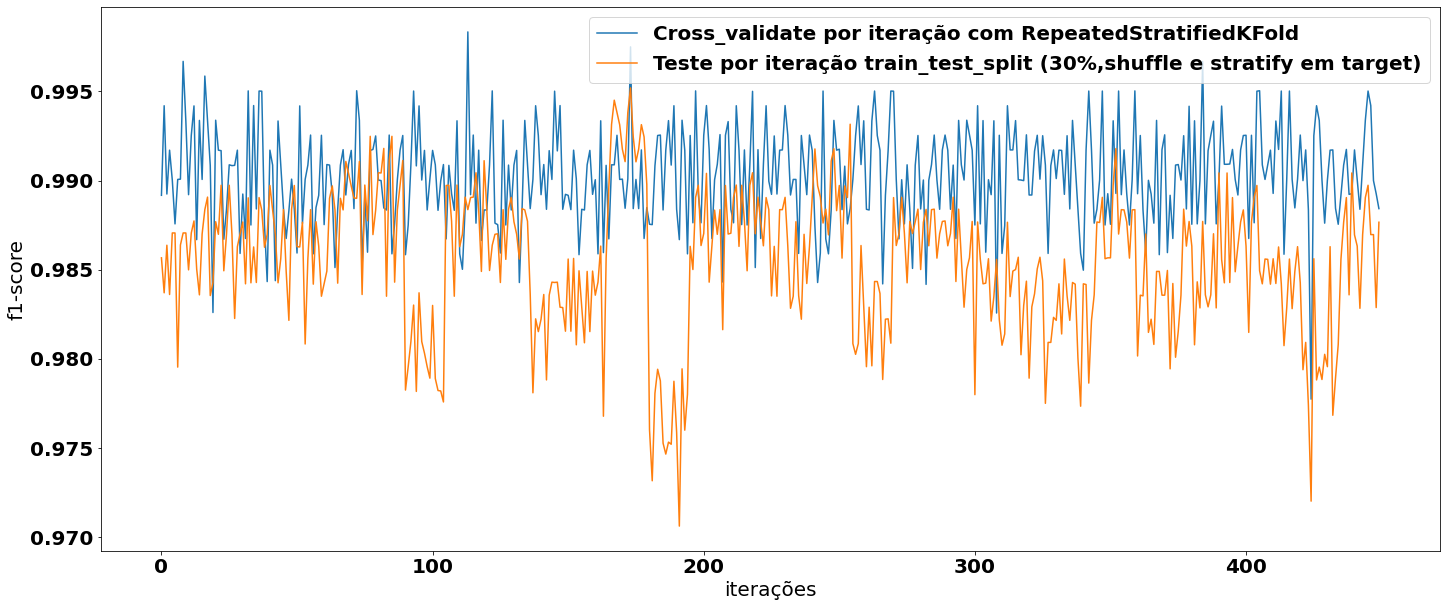

In [ ]:
##### Realiza Validação cruzada para os classificadores configurados ######
arcabouco_xai.exec_crossval_dados("Experimento UPE")

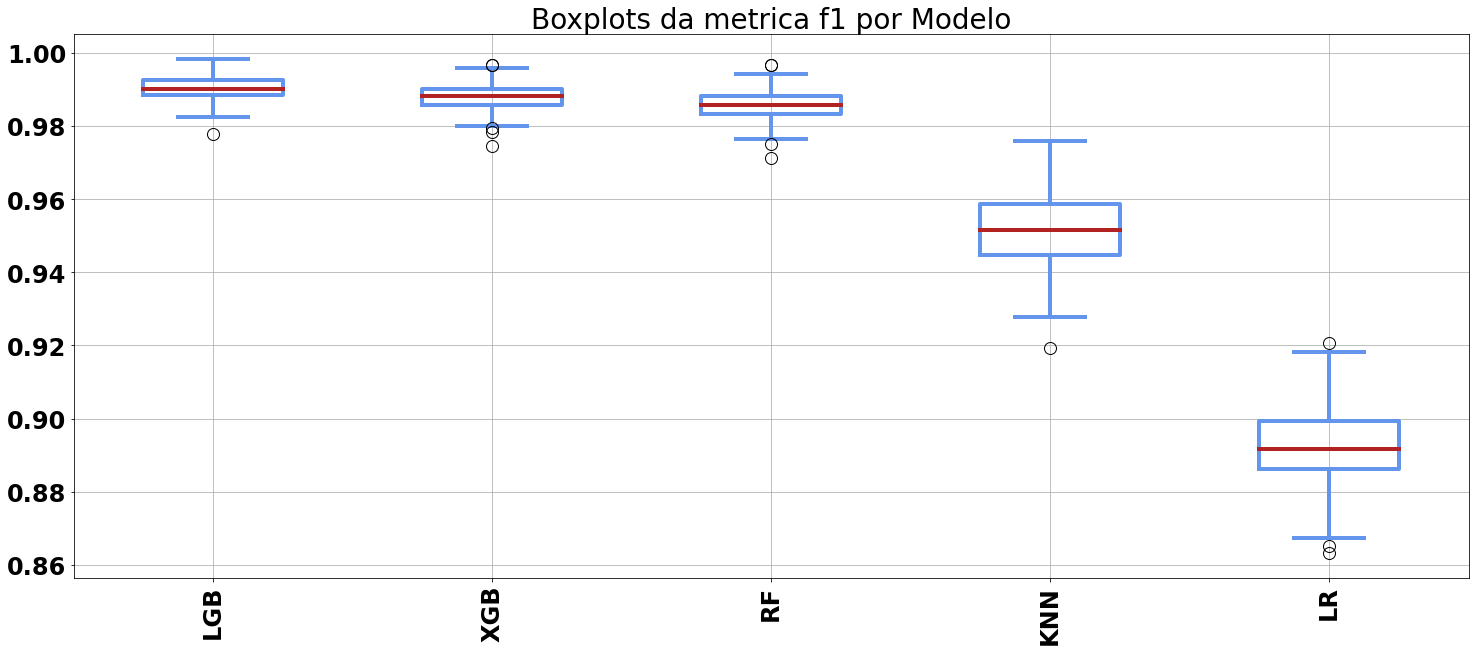

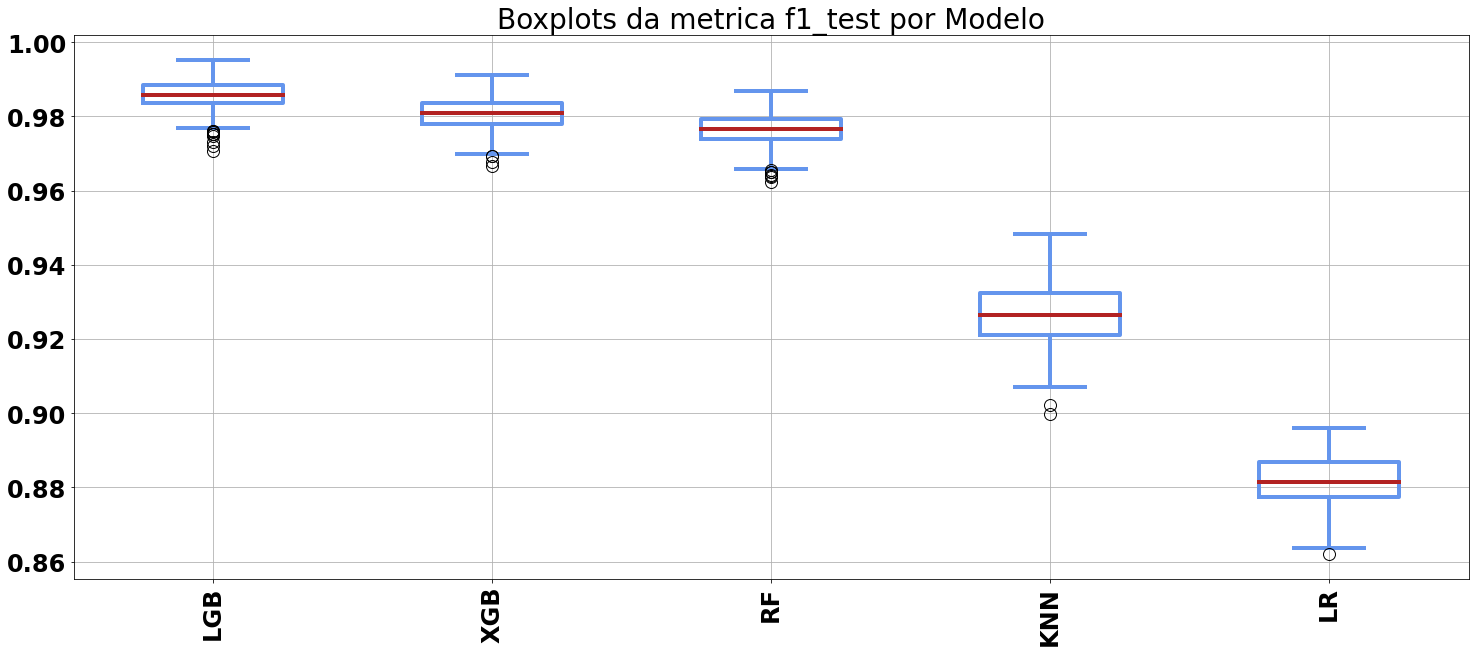

In [ ]:
######## Plota boxplot da validação cruzada ###########
arcabouco_xai.plota_boxplotcrossval("Experimento UPE")

In [ ]:
## Lista a frequência, para cada classificador, dos hiperparâmetros testados ##
arcabouco_xai.lista_melhores_hiperp()

,modelo,hiperparam,qtde
11,XGB,"{'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.16}",22
10,XGB,"{'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 1.0}",6
12,XGB,"{'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 50, 'learning_rate': 0.16}",2
9,RF,"{'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}",30
5,LR,"{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 5000, 'class_weight': 'balanced', 'C': 1}",10
7,LR,"{'solver': 'saga', 'penalty': 'none', 'max_iter': 20, 'class_weight': 'none', 'C': 100}",9
8,LR,"{'solver': 'saga', 'penalty': 'none', 'max_iter': 500, 'class_weight': 'balanced', 'C': 0.001}",7
4,LR,"{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 50, 'class_weight': 'balanced', 'C': 10}",2
6,LR,"{'solver': 'sag', 'penalty': 'l2', 'max_iter': 100, 'class_weight': 'none', 'C': 100}",2
2,LGB,"{'num_leaves': 1200, 'n_estimators': 200, 'max_depth': 75, 'learning_rate': 0.1}",15


In [ ]:
###### Realiza o teste de wilcoxon por pares nos resultados dos modelos#####
arcabouco_xai.exec_testwilcoxon('f1_test')

LR -> KNN WilcoxonResult(statistic=0.0, pvalue=1.8524659289458015e-75)
LR -> RF WilcoxonResult(statistic=0.0, pvalue=1.852471078383219e-75)
LR -> XGB WilcoxonResult(statistic=0.0, pvalue=1.852471078383219e-75)
LR -> LGB WilcoxonResult(statistic=0.0, pvalue=1.8524762278349491e-75)
KNN -> LR WilcoxonResult(statistic=0.0, pvalue=1.8524659289458015e-75)
KNN -> RF WilcoxonResult(statistic=0.0, pvalue=1.8524762278349491e-75)
KNN -> XGB WilcoxonResult(statistic=0.0, pvalue=1.8524762278349491e-75)
KNN -> LGB WilcoxonResult(statistic=0.0, pvalue=1.8524762278349491e-75)
RF -> LR WilcoxonResult(statistic=0.0, pvalue=1.852471078383219e-75)
RF -> KNN WilcoxonResult(statistic=0.0, pvalue=1.8524762278349491e-75)
RF -> XGB WilcoxonResult(statistic=3353.0, pvalue=1.0961799538888708e-65)
RF -> LGB WilcoxonResult(statistic=2.0, pvalue=2.7346144861612883e-75)
XGB -> LR WilcoxonResult(statistic=0.0, pvalue=1.852471078383219e-75)
XGB -> KNN WilcoxonResult(statistic=0.0, pvalue=1.8524762278349491e-75)
XGB ->

In [ ]:
#### Salva os resultados da validação cruzada para todos os modelos tesados ###
arcabouco_xai.salva_df(arcabouco_xai.df_results_crossval,'df_resultados_UPE.xlsx')

In [ ]:
### Altera configurações para que possa realizada crossval apenas no classifica-
### dor CAT
vstatmodcrossval = [{'nome_modelo':'LR','crossval':False},
                    {'nome_modelo':'KNN','crossval':False},
                    {'nome_modelo':'RF','crossval':False},
                    {'nome_modelo':'XGB','crossval':False},
                    {'nome_modelo':'CAT','crossval':True},
                    {'nome_modelo':'LGB','crossval':False}]

for vmodel in vstatmodcrossval:
 engj.config_experimento.defval_cfg_modelo(vmodel['nome_modelo'],
                                           'executa_validacao',vmodel['crossval'])


-----Detecção e remoção de outliers-----
[0.45701067 0.13791159]
Dispersão da base original


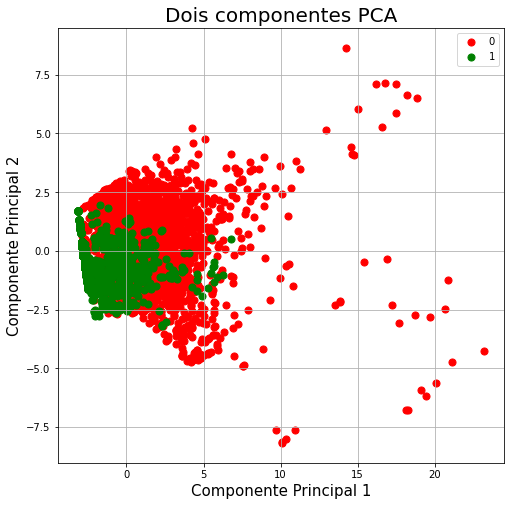

[0.4275162  0.14732145]
Dispersão depois de remoção de outliers


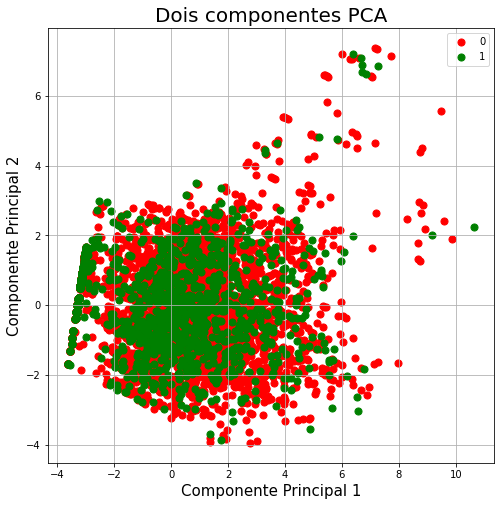

Concluído!
CAT -Dados Normalizados:  False

-----Sem normalização configurada para este classificador-----
Iteração: 1 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({1: 3010, 0: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.99150    Melhor Crossval f1-score......: 0.99751
Média teste f1-score...: 0.98172    Melhor predição teste f1-score: 0.98432
Iteração: 2 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossval f1-score: 0.99073    Melhor Crossval f1-score......: 0.99503
Média teste f1-score...: 0.98536    Melhor predição teste f1-score: 0.98906
Iteração: 3 / 30

-----Balanceamento dos dados com SMOTE-----
Counter({0: 3010, 1: 1181}) Counter({0: 3010, 1: 3010})
Concluído!
Fitting 15 folds for each of 10 candidates, totalling 150 fits
Média Crossva

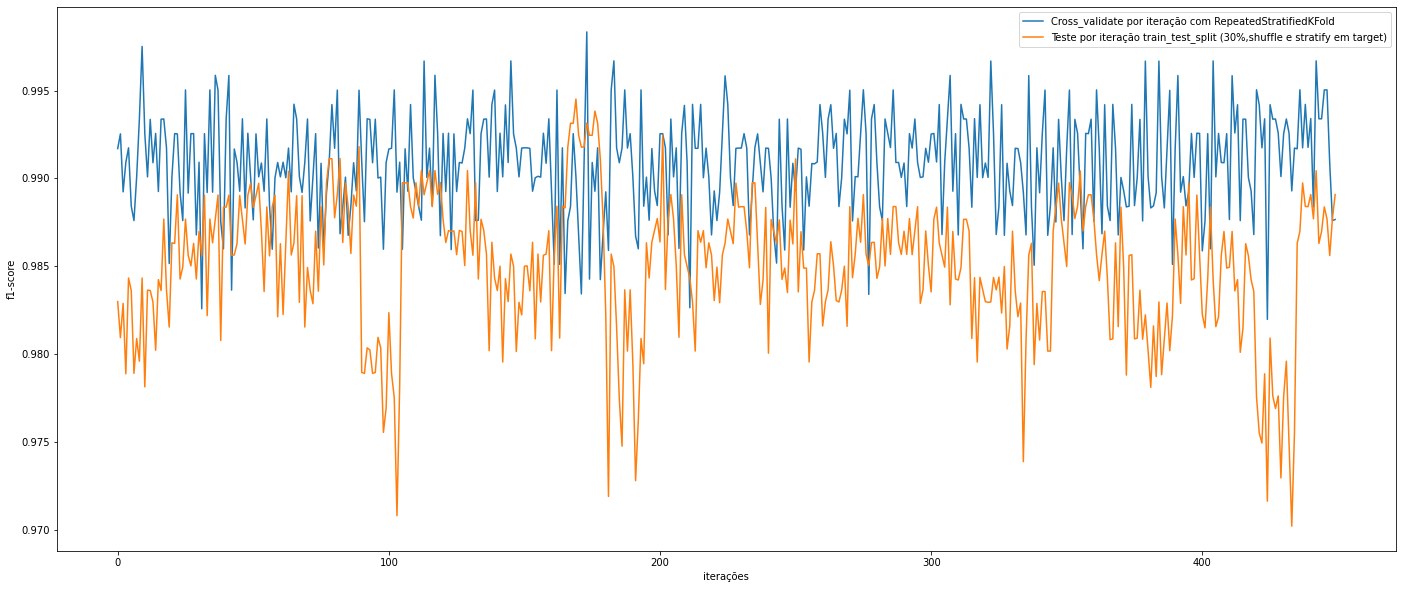

In [ ]:
#### Executa o crossval sem resetar os resultados já obtidos para os outros
#### Classificadores
arcabouco_xai.reset_crossval = False
arcabouco_xai.exec_crossval_dados("Experimento UPE")

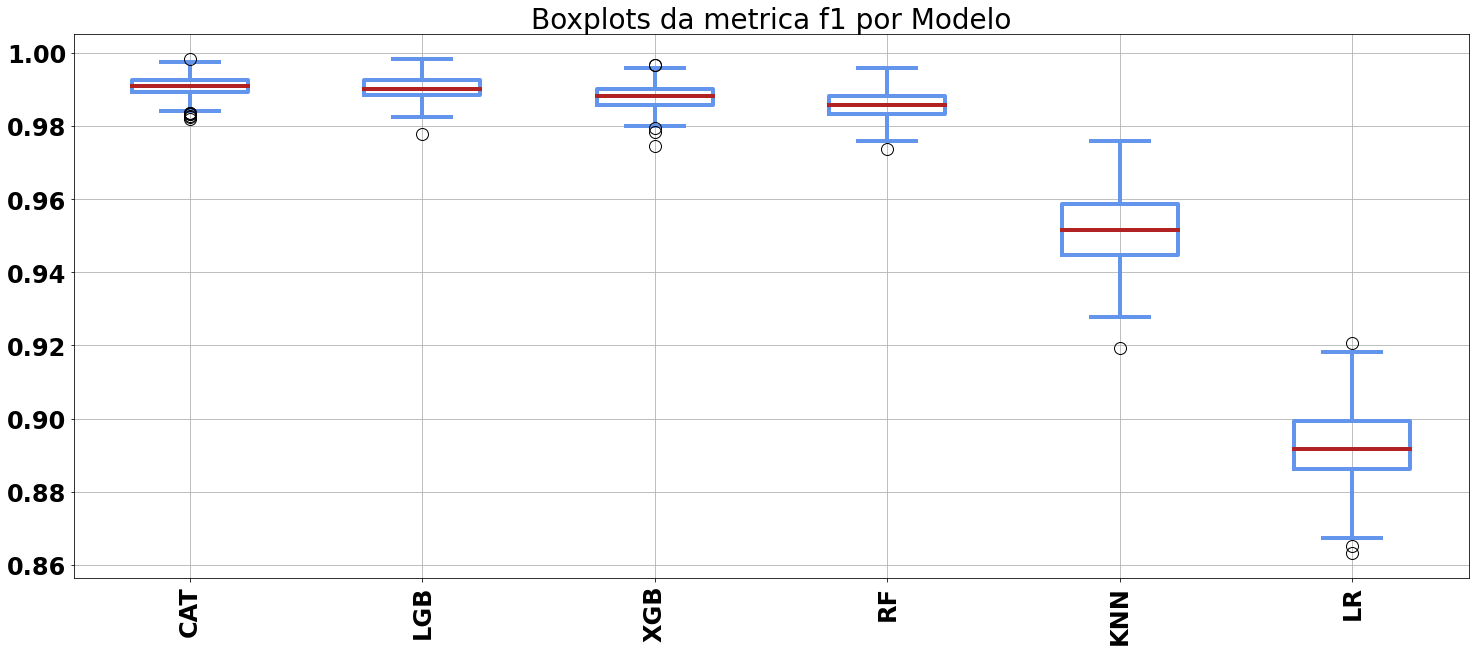

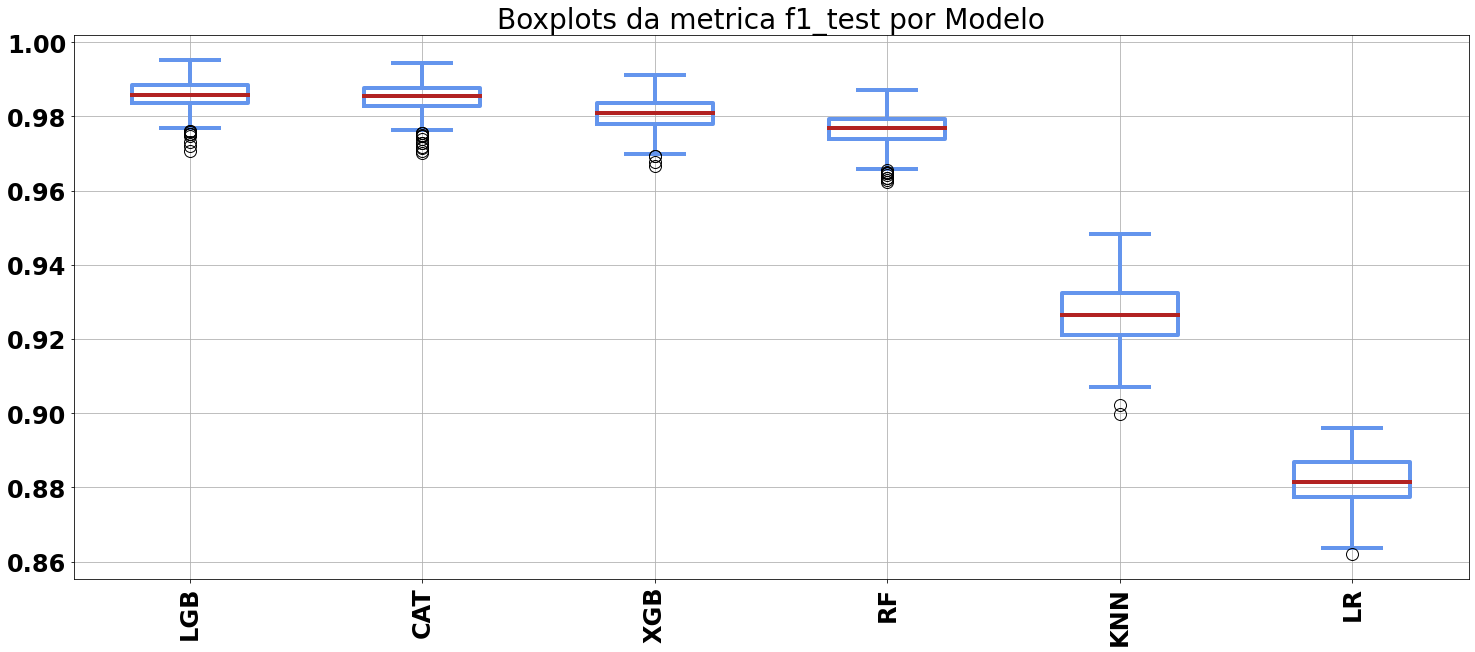

In [ ]:
arcabouco_xai.plota_boxplotcrossval("Experimento UPE")

In [ ]:
########### Salvando os resultados da validação cruzada ############
arcabouco_xai.salva_df(arcabouco_xai.df_results_crossval,'df_resultados_UPE.xlsx')

In [ ]:
###### Exemplo de como utilizar métodos da classe preprocessamento ########
# nome_curso_reduzidos = []
# nome_curso_reduzidos.append(['ADMINISTRACAO - BACHAREL EM ADMINISTRACAO','ADMINISTRACAO'])
# nome_curso_reduzidos.append(['ENGENHARIA CIVIL - ENGENHEIRO CIVIL','ENGENHARIA CIVIL'])
# nome_curso_reduzidos.append(['SISTEMAS DE INFORMACAO  - BACHAREL EM SISTEMAS DE INFORMACAO','SISTEMAS DE INFORMAÇÃO'])
# nome_curso_reduzidos.append(['SUPERIOR DE TECNOLOGIA EM GESTAO DE RECURSOS HUMANOS - TECNOLOGO EM RECURSOS HUMANOS','RECURSOS HUMANOS'])
# nome_curso_reduzidos.append(['SUPERIOR DE TECNOLOGIA EM DESIGN GRAFICO - TECNOLOGO EM DESIGN GRAFICO','DESIGN GRAFICO'])
# nome_curso_reduzidos.append(['PEDAGOGIA - LICENCIATURA - PEDAGOGO','PEDAGOGIA'])
# for nome in nome_curso_reduzidos:
#   arcabouco_xai.df_ = arcabouco_xai.preprocessamento.renomear_conteudo_campo(nome[0],nome[1],arcabouco_xai.df_)

Dados Normalizados:  False

-----Detecção e remoção de outliers-----
[0.45701067 0.13791159]
Dispersão da base original


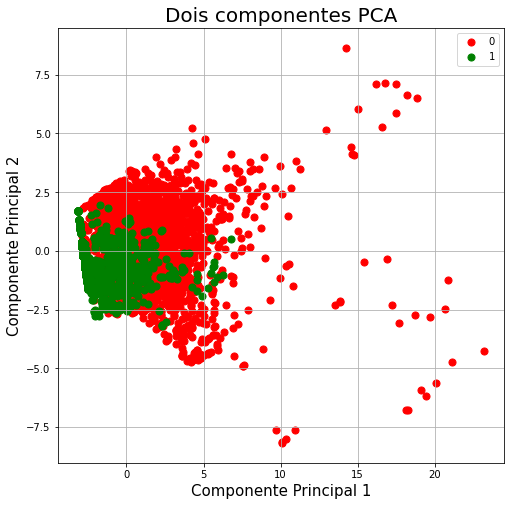

[0.4275162  0.14732145]
Dispersão depois de remoção de outliers


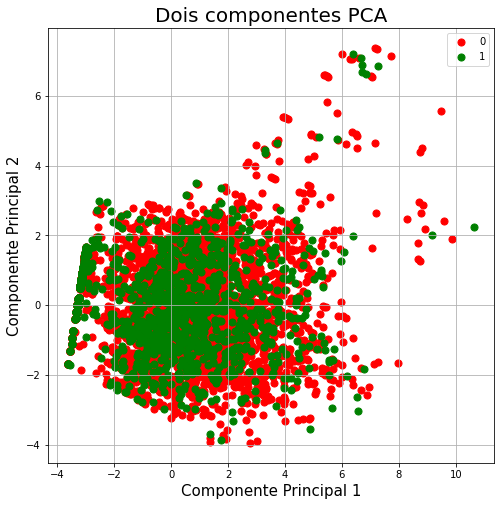

Concluído!

-----Balanceamento dos dados com SMOTE-----
Counter({0: 4301, 1: 1687}) Counter({0: 4301, 1: 4301})
Concluído!

-----Sem normalização configurada para este classificador-----
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9934897819499056
   Best hyperparameters: {'num_leaves': 900, 'n_estimators': 200, 'max_depth': 25, 'learning_rate': 0.1}
LGBMClassifier(max_depth=25, n_estimators=200, num_leaves=900)

-----Efetuando cálculo de Shap Values para os dados de treinamento-----
Modelo:  LGB


100%|===================| 8574/8602 [03:44<00:00]       

Concluído!


In [ ]:
##### Realiza Treinamento com o modelo escolhido após análise dos resultados da
##### Validação cruzada

### Passando hiperparâmetros 
# arcabouco_xai.exec_treino_modelo('LGB','Experimento Exemplo',
#                            params={'num_leaves': 900,
#                                    'n_estimators': 200, 
#                                    'max_depth': 25, 'learning_rate': 0.1})

### Sem passar os hiperparâmetros
arcabouco_xai.exec_treino_modelo('LGB','Experimento sem hiper')

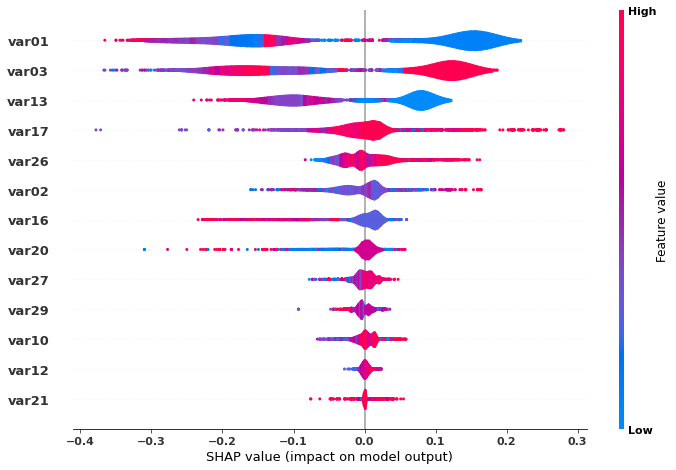

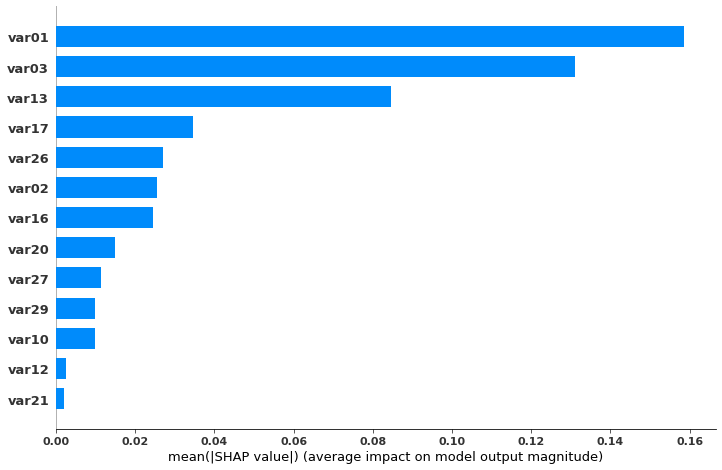

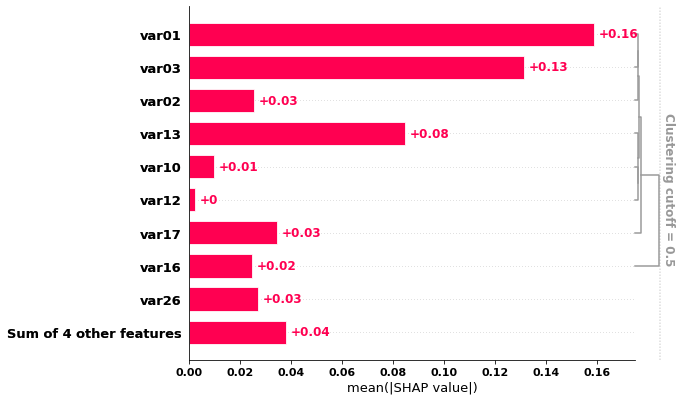

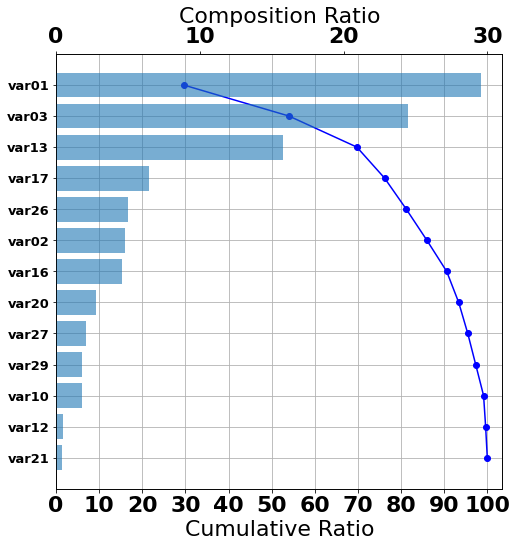

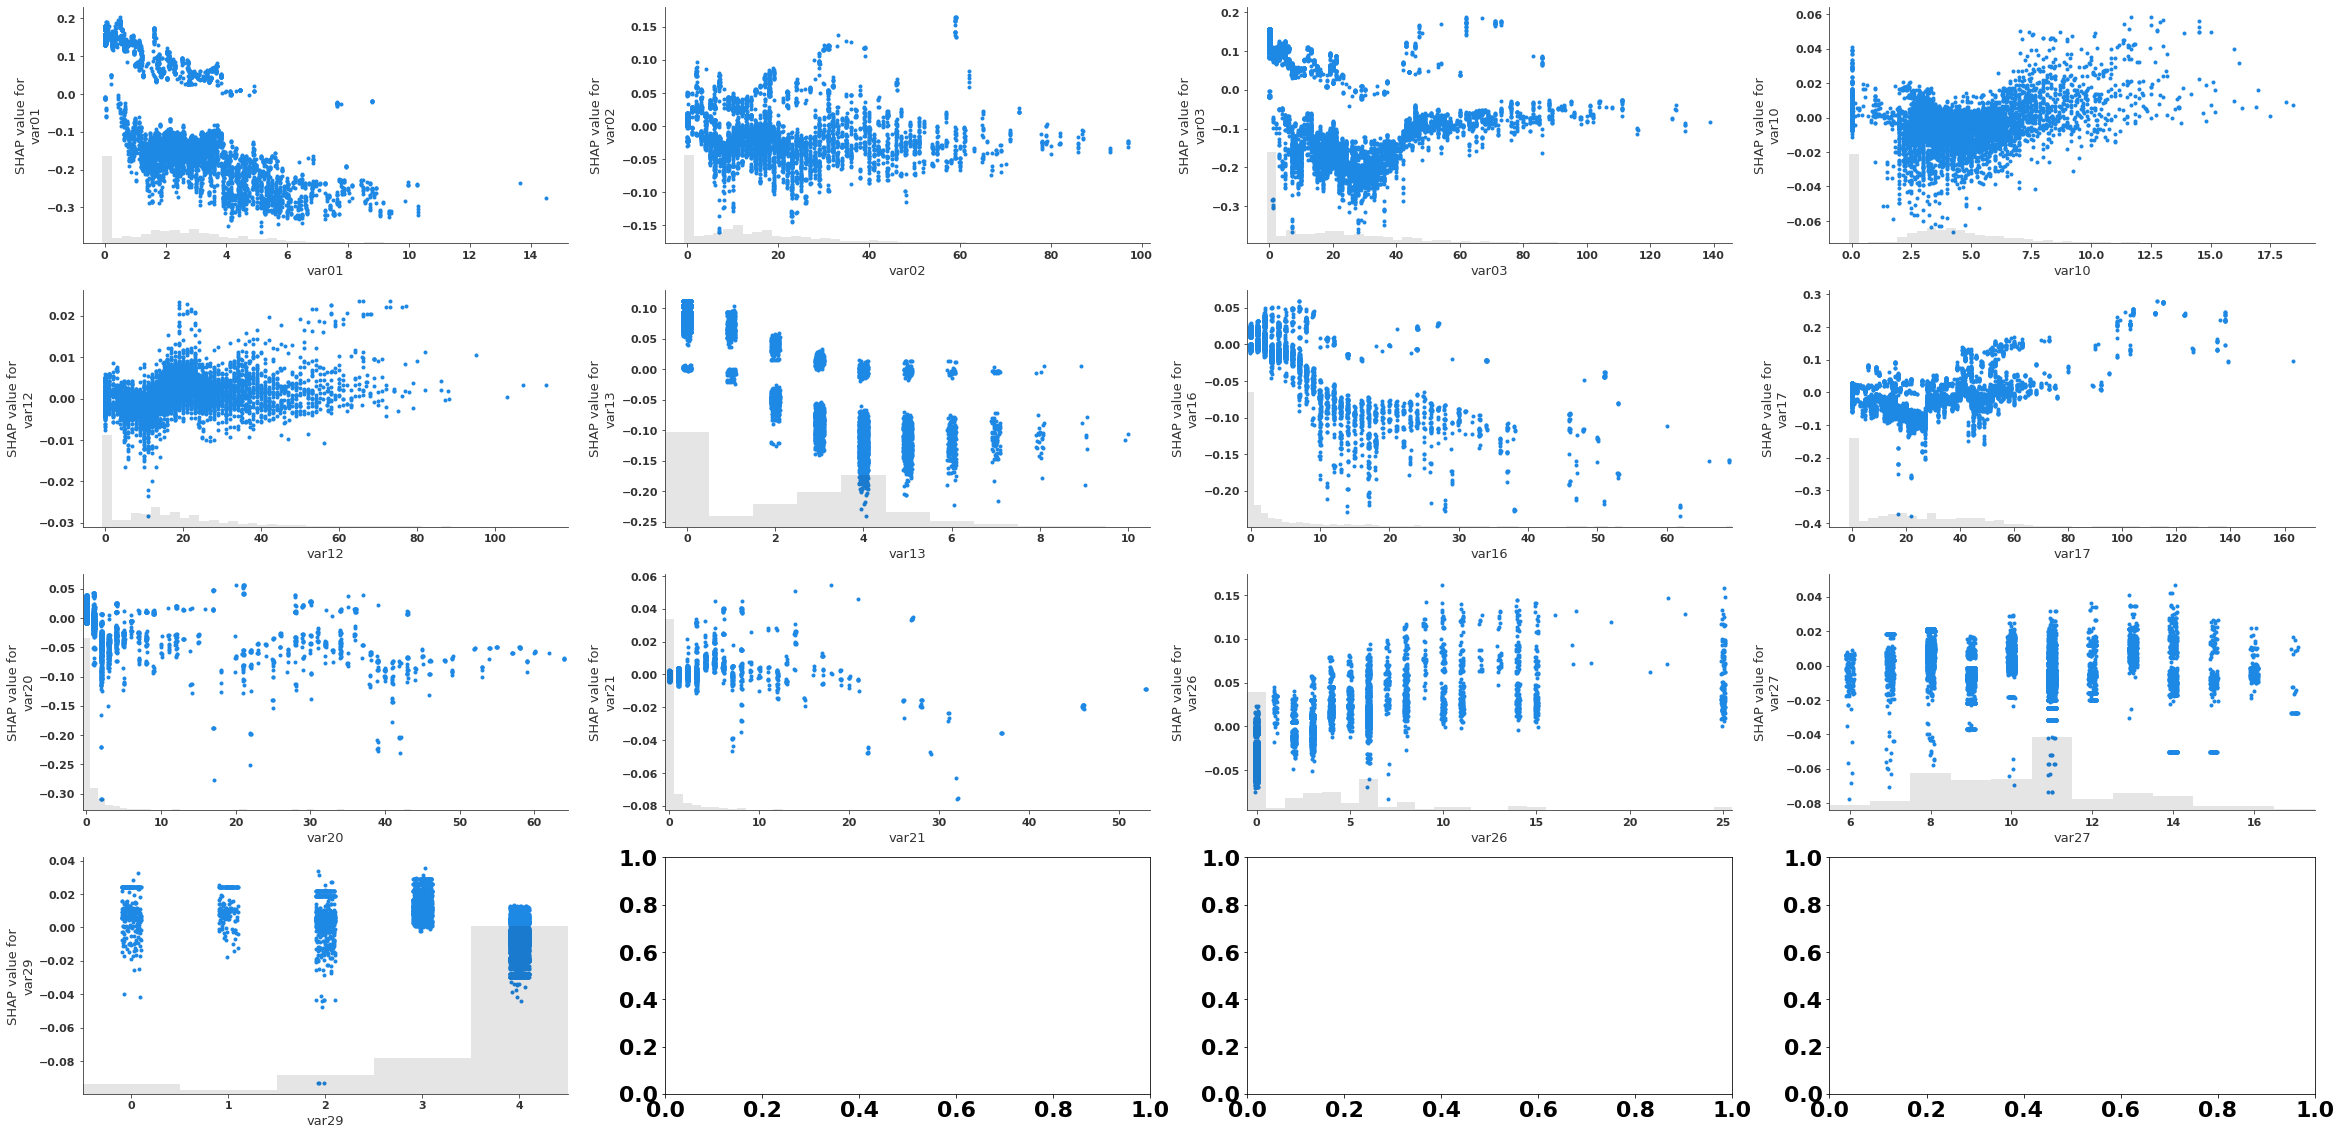

In [ ]:
#### Plota os gráficos SHAP para análise importância global (treinamento) ####
arcabouco_xai.analise_Xai.plota_sumario_beeswarm("Experimento teste")
arcabouco_xai.analise_Xai.plota_sumario_bar("Experimento teste")
arcabouco_xai.analise_Xai.plota_sumario_bardend("Experimento teste")
arcabouco_xai.analise_Xai.plota_waterfall_impacto("Experimento teste")
#### Correção das variáveis independentes com a dependente ####
arcabouco_xai.analise_Xai.plota_scatter_corrtarget_var("Experimento teste")


-----Sem normalização configurada para este classificador-----
Realizando cálculo de importância de features - BorutaShap


  0%|          | 0/200 [00:00<?, ?it/s]

11 attributes confirmed important: ['var26', 'var29', 'var01', 'var16', 'var02', 'var10', 'var17', 'var13', 'var03', 'var20', 'var27']
2 attributes confirmed unimportant: ['var21', 'var12']
0 tentative attributes remains: []
Features para remoção
Boxplot de importância de Features


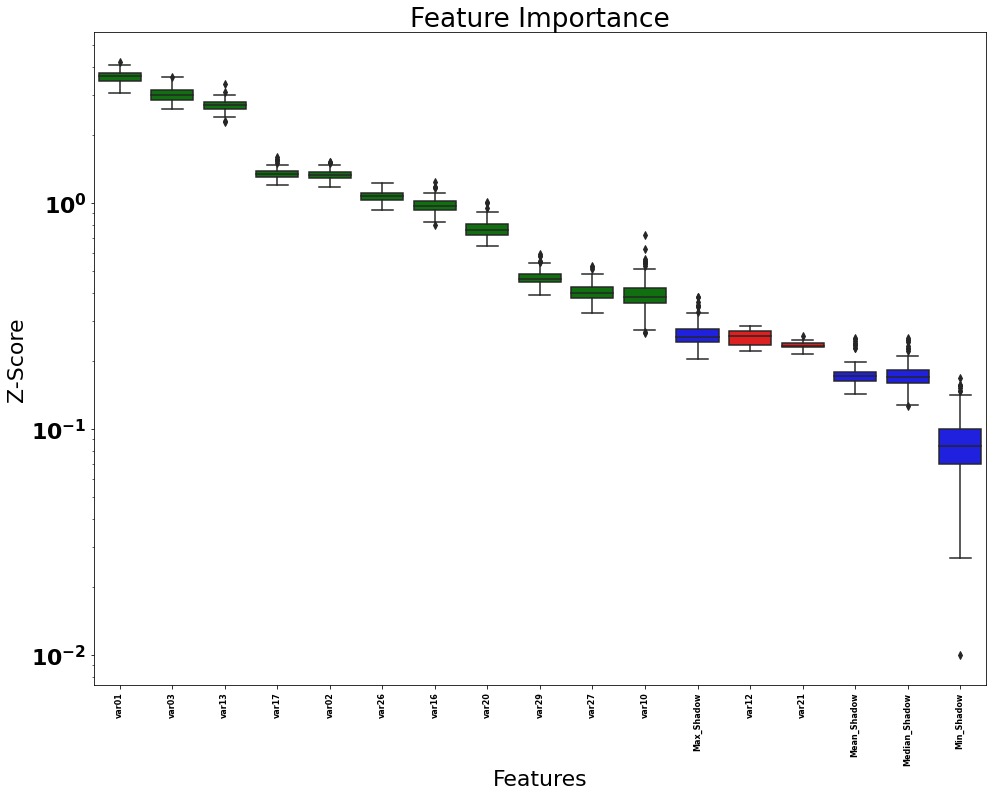

In [ ]:
###### Excução do método wrapper de seleção de atributos para tentar confirmar
###### os atributos importantes para o modelo preditivo
arcabouco_xai.exec_wrapper_borutashap()

In [ ]:
### Este método salvará o modelo treinado com o nome do arquivo passado como parâmetro ###
### Além disso, criará o arquivo X_train.csv, que poderá ser utilizado     ###
### na API Engajamais para análise de explicabilidade local dos resultados ###
arcabouco_xai.salva_modelo("nomearquivo.pkl")

# **Gráficos SHAP para análise explicabilidade local: Exemplo com a base da UNIVALE**

In [ ]:
engj.config_experimento.featuresselecionadas = ['med_ac_lti_sema_disc', 'tmp_medutil_semanahr',
       'med_geral_ac_sema_aluno', 'med_ac_lti_aluno_sema_disc',
       'qtde_reprov_disc', 'qtde_rep_prim_modulo', 'qtde_aprov_prim_modulo',
       'qtde_rep_curso', 'qtde_reprov_ult_modulo', 'qtde_trancamento_curso',
       'qtde_evasao_instituicao', 'qtde_cursos_concluidos_instituicao',
       'idade', 'med_difip_ac_sema_aluno', 'sexo', 'periodo_modulo',
       'med_ac_manha_sema_aluno', 'med_ac_tarde_sema_aluno',
       'med_ac_noite_sema_aluno', 'med_ac_madruga_sema_aluno']

In [ ]:
engj.config_experimento.var_y = 'situacao'

In [ ]:
arcabouco_xai.carrega_arq_treino('Treino27092022.v2.xlsx',tipoarquivo='xlsx')

In [ ]:
engj.config_experimento.featuresselecionadas = ['med_ac_lti_sema_disc','tmp_medutil_semanahr',
                        'med_ac_manha_sema_aluno','med_ac_tarde_sema_aluno',
                        'med_ac_noite_sema_aluno',
                        'med_ac_madruga_sema_aluno',
                        'qtde_aprov_prim_modulo',
                        'idade',
                        'med_difip_ac_sema_aluno',
                        'periodo_modulo',
                        'perc_reprov_disc',
                        'qtde_cursos_concluidos_instituicao',
                        'perc_acess_lti']

arcabouco_xai.df_['perc_acess_lti'] = np.where(
    arcabouco_xai.df_['med_ac_lti_sema_disc'] > 0,
    arcabouco_xai.df_['med_ac_lti_aluno_sema_disc']/
    arcabouco_xai.df_['med_ac_lti_sema_disc'],0)

arcabouco_xai.df_['perc_reprov_disc'] = arcabouco_xai.df_['perc_reprov_disc']/100

Dados Normalizados:  False

-----Detecção e remoção de outliers-----
[0.29765048 0.13832828]
Dispersão da base original


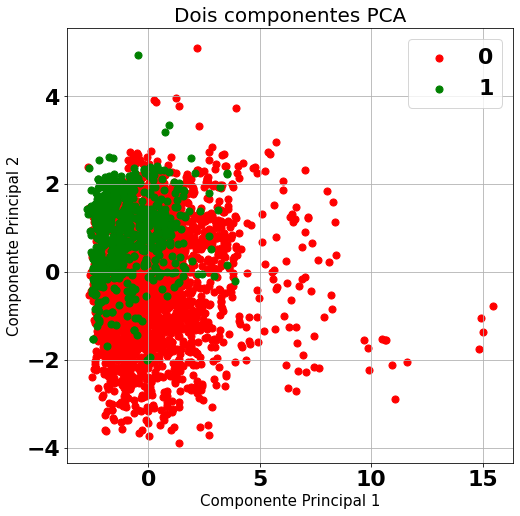

[0.25883559 0.14565171]
Dispersão depois de remoção de outliers


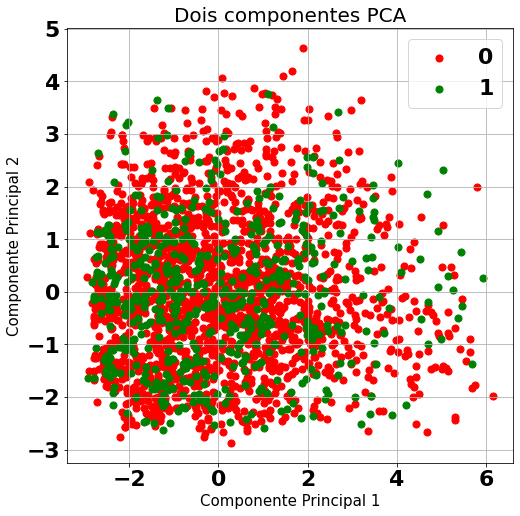

Concluído!

-----Balanceamento dos dados com SMOTE-----
Counter({0: 2158, 1: 610}) Counter({1: 2158, 0: 2158})
Concluído!

-----Sem normalização configurada para este classificador-----
Fitting 15 folds for each of 10 candidates, totalling 150 fits
   Best normalized gini score for 5-fold search: 0.9782195289885701
   Best hyperparameters: {'num_leaves': 900, 'n_estimators': 200, 'max_depth': 25, 'learning_rate': 0.1}
LGBMClassifier(max_depth=25, n_estimators=200, num_leaves=900)

-----Efetuando cálculo de Shap Values para os dados de treinamento-----
Modelo:  LGB


100%|===================| 4309/4316 [03:06<00:00]       

Concluído!


In [ ]:
##### Realiza treinamento do modelo LGB
arcabouco_xai.exec_treino_modelo('LGB','Experimento sem hiper')

In [ ]:
dfteste = pd.read_excel('Dadosteste2022.1.v2.xlsx')
dfteste['perc_acess_lti'] = np.where(dfteste['med_ac_lti_sema_disc'] > 0,dfteste['med_ac_lti_aluno_sema_disc']/dfteste['med_ac_lti_sema_disc'],0)
dfteste['perc_reprov_disc'] = dfteste['perc_reprov_disc']/100
dfteste = dfteste.drop(dfteste[(dfteste['med_ac_lti_sema_disc'] == 0) & (dfteste['tmp_medutil_semanahr'] > 0) & (dfteste['med_geral_ac_sema_aluno'] == 0)].index,axis=0)
dfteste['tmp_medutil_semanahr'] = np.where((dfteste['med_geral_ac_sema_aluno'] == 0) & (dfteste['tmp_medutil_semanahr'] > 0),0,dfteste['tmp_medutil_semanahr'])

LGBMClassifier(max_depth=25, n_estimators=200, num_leaves=900)

-----Sem normalização configurada para este classificador-----


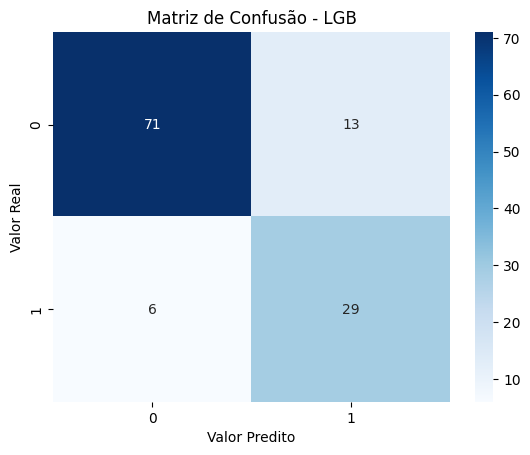

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        84
           1       0.69      0.83      0.75        35

    accuracy                           0.84       119
   macro avg       0.81      0.84      0.82       119
weighted avg       0.85      0.84      0.84       119

ROC-AUC  0.8369047619047619
Concluído!


In [ ]:
#### Executa a predição com dados de um período ############
arcabouco_xai.exec_predicao_modelo(dfteste.drop(dfteste[dfteste['periodo_modulo'] != 5].index, axis=0))

In [ ]:
#### Exibe o Dataframe com os dados do teste e a predição realizada
#### com a probabilidade da situação de evasão (proba_1)
arcabouco_xai.dfpredicteste

In [ ]:
### Novo DataFrame com os erros encontados na predição
diferencas = arcabouco_xai.dfpredicteste[
    arcabouco_xai.dfpredicteste['prediction'] != 
    arcabouco_xai.dfpredicteste[engj.config_experimento.var_y]]

In [ ]:
### Lista o DataFrame das diferenças
diferencas.head()

Pesquisa de aluno : DAVI HOT MIRA Disciplina:  DESIGN E DESENVOLVIMENTO DE BANCO DE DADOS


<Figure size 20000x15000 with 0 Axes>

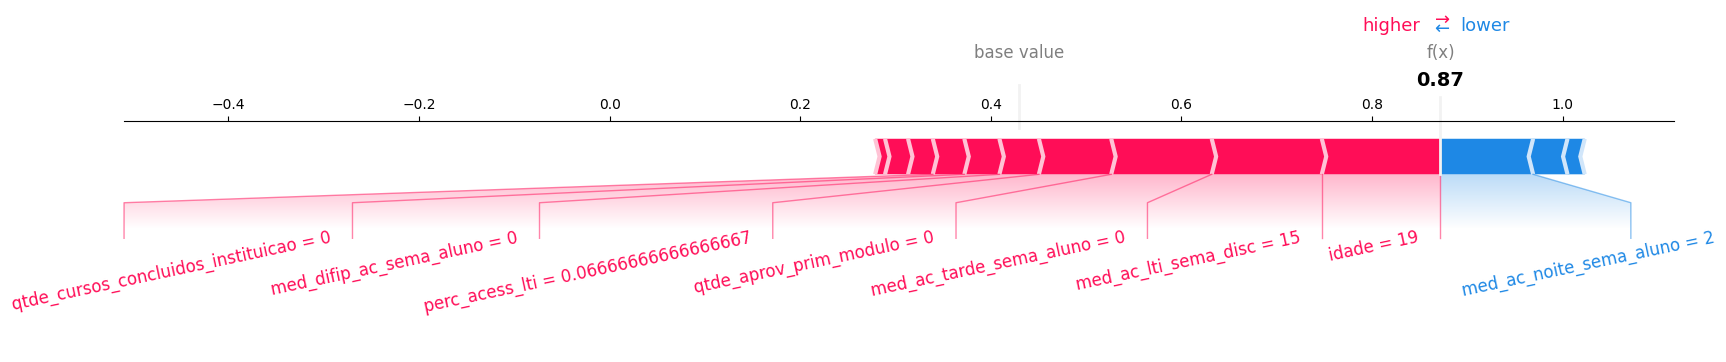

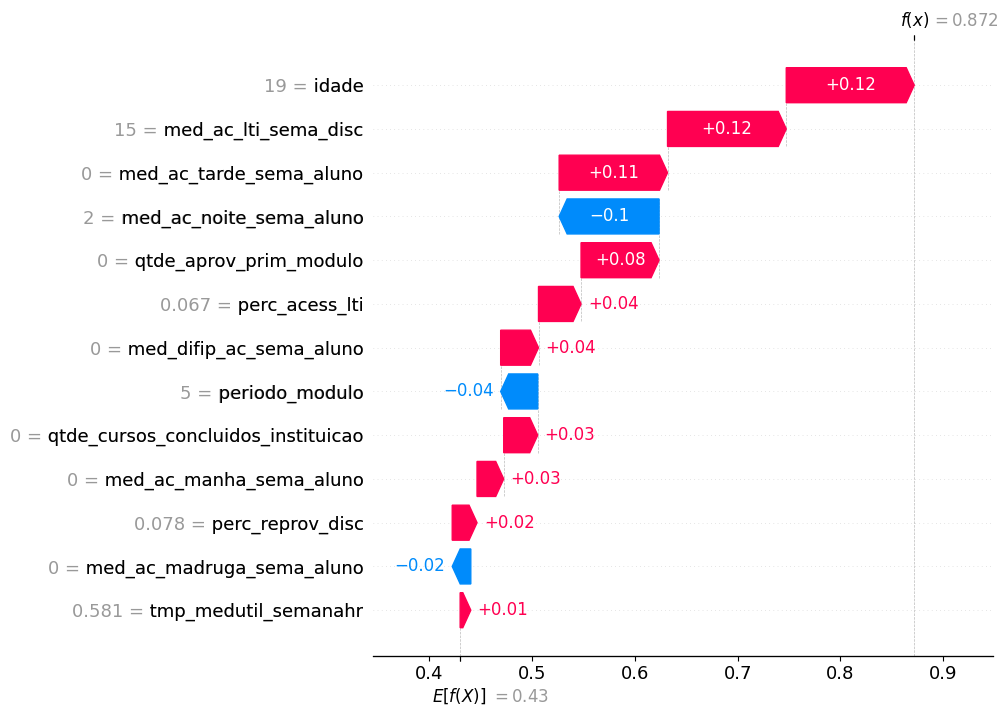

Pesquisa de aluno : DAVI HOT MIRA Disciplina:  ESTRUTURA DE DADOS


<Figure size 20000x15000 with 0 Axes>

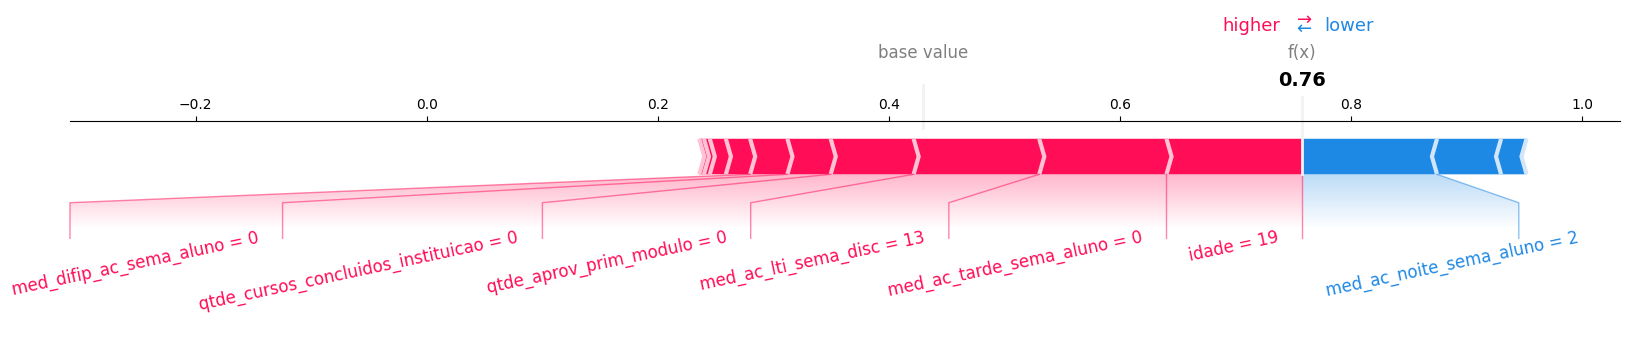

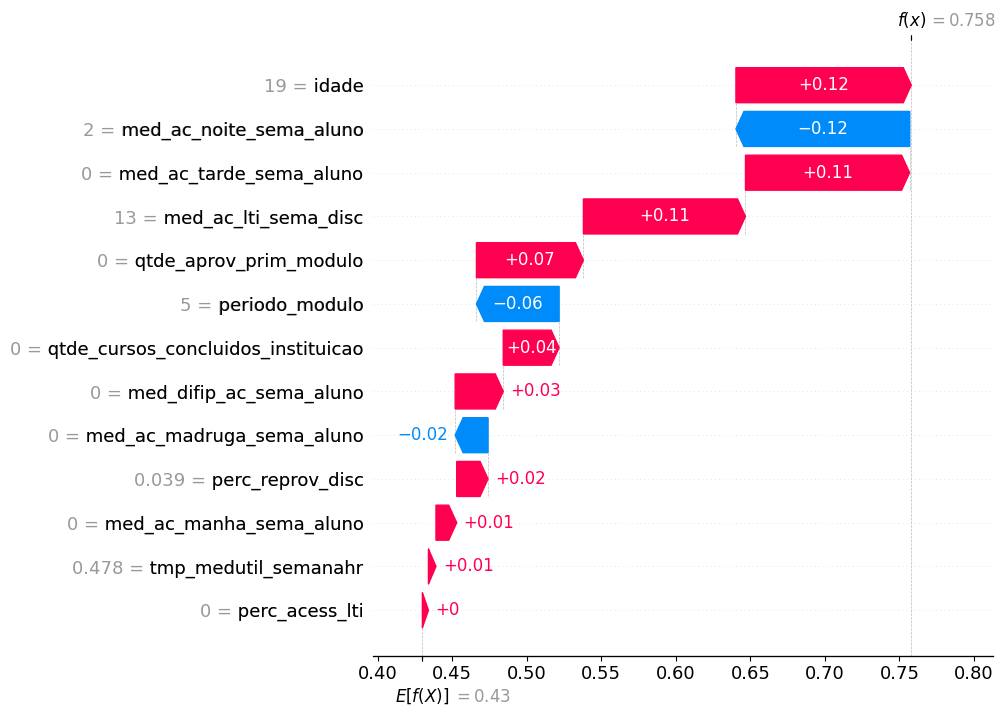

In [ ]:
##### Plota os gráficos de força que as variáveis exerceram para o resultado
##### do modelo preditivo (interpretabilidade local)
arcabouco_xai.analise_Xai.executa_xai_local('aluno','DAVI HOT MIRA',arcabouco_xai.dfpredicteste,'png')